# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the file `forestfires.csv` is in `../data/fires/`, then you can use the code below to load it.

In [1]:
import pandas as pd

# reading the forestfires.csv file 
fires_dt = pd.read_csv('../../05_src/data/fires/forestfires.csv')

# re-assining names to the columns
fires_dt = fires_dt.rename(
    columns = {'X':'coord_x', 'Y':'coord_y', 'month': 'month', 'day':'day', 'FFMC': 'ffmc', 
               'DMC': 'dmc', 'DC':'dc', 'ISI': 'isi', 'temp': 'temp', 'RH': 'rh',
               'wind': 'wind', 'rain': 'rain', 'area': 'area'})

# exploring 
print(fires_dt.info()) # It seems that there are no missing, we have 11 numerical features, and two cathegorical features
print(fires_dt.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None
          coord_x     coord_y        ffmc         dmc          dc         isi  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313

# Get X and Y

Create the features data frame and target data.

In [2]:

# features
features = fires_dt.columns[fires_dt.columns != 'area']
area = fires_dt.columns[fires_dt.columns == 'area']

# features data frame
X = fires_dt[features]

# target data frame
Y= fires_dt[area]

print('Features data frame: ', X.shape)
print('Target data frame: ', Y.shape)
X.columns

Features data frame:  (517, 12)
Target data frame:  (517, 1)


Index(['coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi',
       'temp', 'rh', 'wind', 'rain'],
      dtype='object')

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


In [62]:
# importing libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle
import shap
import contextlib
import os

### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [15]:
# preproc1

# Define column names for different types of features (numerical and categorical)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# numerical features
nums1 = Pipeline([ 
    ('scaler', StandardScaler(),) # Scale features using StandaScaler
])

# categorical features
cat1 = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical features -OneHotEncoder
])

preproc1 = ColumnTransformer([
    ('num_trasnforms', nums1, numeric_features), # Apply num_transforms to numerical features
    ('cat_trasnforms', cat1, categorical_features) # Apply cat_transforms to categorical features
])

preproc1

ColumnTransformer(transformers=[('num_trasnforms',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
       'rain'],
      dtype='object')),
                                ('cat_trasnforms',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['month', 'day'], dtype='object'))])

### Preproc 2

Create preproc2 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [16]:
# Pipeline for some  numeric variables using StandardScaler followed by PowerTransformer

# Pipeline for the other numeric variables (StandardScaler only)
nums1 = Pipeline([
    ('scaler', StandardScaler())  # Step 1: Scale features using StandardScaler
])

nums2 = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale features using StandardScaler
    ('transform', PowerTransformer(method='yeo-johnson', standardize=False, copy=False))  # Step 2: Transform using Yeo-Johnson
])

# Pipeline for categorical features
cat2 = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# ColumnTransformer: Apply different transformations to selected numeric features and categorical features
preproc2 = ColumnTransformer([
    ('num_transforms_nums2', nums1, ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi']),  # Apply nums2 to rest of the numeric variables
    ('num_transforms_nums1', nums2, ['temp', 'rh', 'wind', 'rain']),  # Apply nums1 to a subset of numeric variables
    ('cat_transforms', cat2, categorical_features)  # Apply cat2 to categorical features
])

preproc2

ColumnTransformer(transformers=[('num_transforms_nums2',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi']),
                                ('num_transforms_nums1',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('transform',
                                                  PowerTransformer(copy=False,
                                                                   standardize=False))]),
                                 ['temp', 'rh', 'wind', 'rain']),
                                ('cat_transforms',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['month', 'day'], dtype='object'))])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [17]:
# Pipeline A = preproc1 + baseline

# Create the regression pipeline with LinearRegression
Pipeline_A = Pipeline([
    ('preprocessing', preproc1),  # Preprocessing 1
    ('regressor', LinearRegression())  # LinearRegression as the regressor
])

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Perform cross-validation on training data
cv_results = cross_validate(Pipeline_A, X_train, Y_train, cv=5,
                            scoring=('neg_mean_squared_error', 'r2'),
                            return_train_score=True)

# Extract and print cross-validation results
train_rmse_cv = np.sqrt(-cv_results['train_neg_mean_squared_error'])
test_rmse_cv = np.sqrt(-cv_results['test_neg_mean_squared_error'])
mean_train_rmse = np.mean(train_rmse_cv)
mean_test_rmse = np.mean(test_rmse_cv)

train_r2_cv = cv_results['train_r2']
test_r2_cv = cv_results['test_r2']
mean_train_r2 = np.mean(train_r2_cv)
mean_test_r2 = np.mean(test_r2_cv)

# Print cross-validation results
print("\nCross-validation results:")
print(f"Train RMSE: {train_rmse_cv}")
print(f"Mean Train RMSE: {mean_train_rmse:.3f}")
print(f"Test RMSE: {test_rmse_cv}")
print(f"Mean Test RMSE: {mean_test_rmse:.3f}")

print(f"\nTrain R^2: {train_r2_cv}")
print(f"Mean Train R^2: {mean_train_r2:.3f}")
print(f"Test R^2: {test_r2_cv}")
print(f"Mean Test R^2: {mean_test_r2:.3f}")



Cross-validation results:
Train RMSE: [45.57465123 48.89302357 47.68924235 27.03532174 48.00669494]
Mean Train RMSE: 43.440
Test RMSE: [40.7767344  19.57811391 33.3675258  85.26917909 26.89522755]
Mean Test RMSE: 41.177

Train R^2: [0.05253757 0.05984555 0.06080771 0.08034482 0.0573024 ]
Mean Train R^2: 0.062
Test R^2: [-0.01926665 -0.77182861 -0.54567613 -0.009167   -0.2320665 ]
Mean Test R^2: -0.316


For pipeline A:

* The train RMSE of 43.440 indicates that, on average, the model’s predictions are off by approximately 43.440 units from the actual values in the training set. This suggests that the model has errors in predicting the target variable for the training data.


* And the test RMSE of 41.177 indicates that, on average, the model’s predictions are off by approximately 41.177 units from the actual values in the test set. This suggests that the model is not preforming well making accurate predictions.

* The negative $R^2$ value (-0.316) for the test dataset and high RMSE values indicate that the model is not performing well. It is likely underfitting and unable to capture the underlying patterns in the data.

* This results indicate that the model might not trained really well the forestfires data in this pipeline.

In [18]:
# Pipeline B = preproc2 + baseline

# Create the regression pipeline with LinearRegression
Pipeline_B = Pipeline([
    ('preprocessing', preproc2),  # Preprocessing 2
    ('regressor', LinearRegression())  # LinearRegression as the regressor
])

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Perform cross-validation on training data
cv_results = cross_validate(Pipeline_B, X_train, Y_train, cv=5,
                            scoring=('neg_mean_squared_error', 'r2'),
                            return_train_score=True)

# Extract and print cross-validation results
train_rmse_cv = np.sqrt(-cv_results['train_neg_mean_squared_error'])
test_rmse_cv = np.sqrt(-cv_results['test_neg_mean_squared_error'])
mean_train_rmse = np.mean(train_rmse_cv)
mean_test_rmse = np.mean(test_rmse_cv)

train_r2_cv = cv_results['train_r2']
test_r2_cv = cv_results['test_r2']
mean_train_r2 = np.mean(train_r2_cv)
mean_test_r2 = np.mean(test_r2_cv)

# Print cross-validation results
print("\nCross-validation results:")
print(f"Train RMSE: {train_rmse_cv}")
print(f"Mean Train RMSE: {mean_train_rmse:.3f}")
print(f"Test RMSE: {test_rmse_cv}")
print(f"Mean Test RMSE: {mean_test_rmse:.3f}")

print(f"\nTrain R^2: {train_r2_cv}")
print(f"Mean Train R^2: {mean_train_r2:.3f}")
print(f"Test R^2: {test_r2_cv}")
print(f"Mean Test R^2: {mean_test_r2:.3f}")


Cross-validation results:
Train RMSE: [45.5381889  48.85974252 47.67841297 27.01516117 47.97539779]
Mean Train RMSE: 43.413
Test RMSE: [40.90572875 19.58611857 29.13779222 85.22354215 26.8701151 ]
Mean Test RMSE: 40.345

Train R^2: [0.05405301 0.06112503 0.06123421 0.0817159  0.05853115]
Mean Train R^2: 0.063
Test R^2: [-0.02572561 -0.77327776 -0.17864705 -0.00808705 -0.22976678]
Mean Test R^2: -0.243


* In terms of the RSME results, pipeine B model's predictions have a relatively high error rate, with both training and test sets.

* Same than the previous pipeline Mean Test $R^2$ is negative (-0.24), this means that the model does not explain much of the variance in the data and is performing poorly in both test and training sets. Very similar than pipeline A.

In [19]:
# Pipeline C = preproc1 + advanced model

# Create the regression pipeline
Pipeline_C = Pipeline([
    ('preprocessing', preproc1),  # Preprocessing steps
    ('regressor', RandomForestRegressor())  # RandomForestRegressor as the regressor
])
Pipeline_C

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Perform cross-validation on training data
cv_results = cross_validate(Pipeline_C, X_train, Y_train, cv=5,
                            scoring=('neg_mean_squared_error', 'r2'),
                            return_train_score=True)

# Extract and print cross-validation results
train_rmse_cv = np.sqrt(-cv_results['train_neg_mean_squared_error'])
test_rmse_cv = np.sqrt(-cv_results['test_neg_mean_squared_error'])
mean_train_rmse = np.mean(train_rmse_cv)
mean_test_rmse = np.mean(test_rmse_cv)

train_r2_cv = cv_results['train_r2']
test_r2_cv = cv_results['test_r2']
mean_train_r2 = np.mean(train_r2_cv)
mean_test_r2 = np.mean(test_r2_cv)

# Print cross-validation results
print("\nCross-validation results:")
print(f"Train RMSE: {train_rmse_cv}")
print(f"Mean Train RMSE: {mean_train_rmse:.3f}")
print(f"Test RMSE: {test_rmse_cv}")
print(f"Mean Test RMSE: {mean_test_rmse:.3f}")

print(f"\nTrain R^2: {train_r2_cv}")
print(f"Mean Train R^2: {mean_train_r2:.3f}")
print(f"Test R^2: {test_r2_cv}")
print(f"Mean Test R^2: {mean_test_r2:.3f}")

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y wa


Cross-validation results:
Train RMSE: [19.22473624 21.46957415 20.44135209 12.06017453 21.83629902]
Mean Train RMSE: 19.006
Test RMSE: [54.59799804 43.56506656 31.80766671 87.38842729 27.63805014]
Mean Test RMSE: 48.999

Train R^2: [0.83140835 0.81871901 0.82744287 0.8169924  0.80495858]
Mean Train R^2: 0.820
Test R^2: [-0.8273274  -7.77317461 -0.40454001 -0.05995328 -0.30106354]
Mean Test R^2: -1.873


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


* Pipeline C perfor better than the previous two pipelines with a mean train RMSE value of 19.006, but the Mean Test RMSE of 48.999. While the training RMSE is relatively low, indicating good performance in predicting the training data, the test RMSE is much higher, suggesting that the model does not generalize well to new data and exhibits high variability in prediction errors across different folds.


* In term of the $R^2$ Mean Train R-squared was 0.820 suggests a good fit of the model to the training data. But was not the case for the testing set with an  $R^2$ Mean Train R-squared of -1.873. Again ratifying a goot fit for the testing set but not foor the testing set.

In [20]:
# Pipeline D = preproc2 + advanced model

# Create the regression pipeline
Pipeline_D = Pipeline([
    ('preprocessing', preproc2),  # Preprocessing steps
    ('regressor', RandomForestRegressor())  # RandomForestRegressor as the regressor
])
Pipeline_D

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Perform cross-validation on training data
cv_results = cross_validate(Pipeline_D, X_train, Y_train, cv=5,
                            scoring=('neg_mean_squared_error', 'r2'),
                            return_train_score=True)

# Extract and print cross-validation results
train_rmse_cv = np.sqrt(-cv_results['train_neg_mean_squared_error'])
test_rmse_cv = np.sqrt(-cv_results['test_neg_mean_squared_error'])
mean_train_rmse = np.mean(train_rmse_cv)
mean_test_rmse = np.mean(test_rmse_cv)

train_r2_cv = cv_results['train_r2']
test_r2_cv = cv_results['test_r2']
mean_train_r2 = np.mean(train_r2_cv)
mean_test_r2 = np.mean(test_r2_cv)

# Print cross-validation results
print("\nCross-validation results:")
print(f"Train RMSE: {train_rmse_cv}")
print(f"Mean Train RMSE: {mean_train_rmse:.3f}")
print(f"Test RMSE: {test_rmse_cv}")
print(f"Mean Test RMSE: {mean_test_rmse:.3f}")

print(f"\nTrain R^2: {train_r2_cv}")
print(f"Mean Train R^2: {mean_train_r2:.3f}")
print(f"Test R^2: {test_r2_cv}")
print(f"Mean Test R^2: {mean_test_r2:.3f}")

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y wa


Cross-validation results:
Train RMSE: [18.54179859 18.91041091 21.26234954 11.99821081 19.68203033]
Mean Train RMSE: 18.079
Test RMSE: [55.03397547 43.89177158 30.93856369 86.58073607 27.83185965]
Mean Test RMSE: 48.855

Train R^2: [0.84317366 0.85936049 0.8133035  0.81886811 0.84154404]
Mean Train R^2: 0.835
Test R^2: [-0.85662717 -7.90525233 -0.32883417 -0.0404505  -0.31937471]
Mean Test R^2: -1.890


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


* Pipeline D perfor a little bit better (not for much) than pipeline C with a mean train RMSE value of 18.079, but same that pipeline C the Mean Test RMSE of 48.855. So while the training RMSE is relatively low, the test RMSE is much higher.

* For the $R^2$ Mean Train R-squared was 0.835 again suggests a good fit of the model to the training data. But was not for the testing set: $R^2$ Mean Train R-squared of -1.890. 

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

### Tunning Pipeline A

In [57]:
#tunning Pipeline_A using grid search

# Define the parameter grid
param_grid_A = {
    'regressor__fit_intercept': [True, False],  # Whether to calculate the intercept
    'preprocessing__num_trasnforms__scaler__with_mean': [True, False],  # Centering the data
    'preprocessing__num_trasnforms__scaler__with_std': [True, False],   # Scaling to unit variance
}

#use gridsearch to test all values for n_neighbors
pipe_gs_A = GridSearchCV(Pipeline_A, param_grid_A, cv=5, verbose=10)

#fit model to data
with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stdout(devnull):
        pipe_gs_A.fit(X, Y)


In [58]:
# Print best parameters and best score
print("Best parameters: ", pipe_gs_A.best_params_)
print("Best score: ", pipe_gs_A.best_score_)

Best parameters:  {'preprocessing__num_trasnforms__scaler__with_mean': False, 'preprocessing__num_trasnforms__scaler__with_std': False, 'regressor__fit_intercept': False}
Best score:  -4.61739851919093


After GridSearch, tunning three hyperparameters for pipeline A, the lowest RMSE found was 47.22514022183136 still very high.

### Tunning pipeline B

In [59]:
#tunning Pipeline_B using grid search

# Define the parameter grid
param_grid_B = {
    'regressor__fit_intercept': [True, False],  # Whether to calculate the intercept
    'preprocessing__num_transforms_nums2__scaler__with_mean': [True, False],  # Centering the data for num_transforms_nums2
    'preprocessing__num_transforms_nums2__scaler__with_std': [True, False],   # Scaling to unit variance for num_transforms_nums2
    'preprocessing__num_transforms_nums1__scaler__with_mean': [True, False],  # Centering the data for num_transforms_nums1
    'preprocessing__num_transforms_nums1__scaler__with_std': [True, False],    # Scaling to unit variance for num_transforms_nums1
    'preprocessing__num_transforms_nums1__transform__method': ['yeo-johnson', 'box-cox'],  # Method for PowerTransformer in num_transforms_nums1
}

#use gridsearch to test all values for n_neighbors
pipe_gs_B = GridSearchCV(Pipeline_B, param_grid_B, cv=5, verbose=10)

#fit model to data
with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stdout(devnull):
        pipe_gs_B.fit(X, Y)

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/pipeline.py", line 

In [60]:
# Print best parameters and best score
# Print best parameters and best score
print("Best parameters: ", pipe_gs_B.best_params_)
print("Best score: ", pipe_gs_B.best_score_)

Best parameters:  {'preprocessing__num_transforms_nums1__scaler__with_mean': True, 'preprocessing__num_transforms_nums1__scaler__with_std': True, 'preprocessing__num_transforms_nums1__transform__method': 'yeo-johnson', 'preprocessing__num_transforms_nums2__scaler__with_mean': False, 'preprocessing__num_transforms_nums2__scaler__with_std': False, 'regressor__fit_intercept': False}
Best score:  -4.57136568997287


After GridSearch, tunning multiple hyperparameters for pipeline B, the lowest RMSE found was 46.65708790276945 a little bit lower than the previous one but still very high.

### Tunning pipeline C

In [55]:
#tunning Pipeline_C using grid search

#create a dictionary of all values we want to test for n_neighbors
# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [50, 100, 200],          # Number of trees in the forest
    'regressor__max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider at every split
    'regressor__max_depth': [None, 10, 20, 30],          # Maximum number of levels in tree
    'regressor__min_samples_split': [2, 5, 10],          # Minimum number of samples required to split a node
    'regressor__min_samples_leaf': [1, 2, 4],            # Minimum number of samples required at each leaf node
    'regressor__bootstrap': [True, False]                # Method of selecting samples for training each tree
}
#use gridsearch to test all values for n_neighbors
pipe_gs_C = GridSearchCV(Pipeline_C, param_grid, cv=5, verbose=10)

# Fit the grid search to the data
with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stdout(devnull):
        pipe_gs_C.fit(X, Y)


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y wa

In [56]:
# Print best parameters and best score
print("Best parameters: ", pipe_gs_C.best_params_)
print("Best score: ", pipe_gs_C.best_score_)

Best parameters:  {'regressor__bootstrap': True, 'regressor__max_depth': 30, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}
Best score:  -2.329792673581198


### Tunning pipeline D

In [61]:
#tunning Pipeline_D using grid search

#create a dictionary of all values we want to test for n_neighbors
# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [50, 100, 200],          # Number of trees in the forest
    'regressor__max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider at every split
    'regressor__max_depth': [None, 10, 20, 30],          # Maximum number of levels in tree
    'regressor__min_samples_split': [2, 5, 10],          # Minimum number of samples required to split a node
    'regressor__min_samples_leaf': [1, 2, 4],            # Minimum number of samples required at each leaf node
    'regressor__bootstrap': [True, False]                # Method of selecting samples for training each tree
}
#use gridsearch to test all values for n_neighbors
pipe_gs_D = GridSearchCV(Pipeline_D, param_grid, cv=5, verbose=10)

# Fit the grid search to the data
with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stdout(devnull):
        pipe_gs_D.fit(X_train, Y_train)


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y wa

In [63]:
# Print best parameters and best score
print("Best parameters: ", pipe_gs_D.best_params_)
print("Best score: ", pipe_gs_D.best_score_)

Best parameters:  {'regressor__bootstrap': True, 'regressor__max_depth': 30, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}
Best score:  -0.15796425720033555


# Evaluate

+ Which model has the best performance?

Pipeline D with RandomForestRegressor

Best parameters:  {'regressor__bootstrap': True, 'regressor__max_depth': 30, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}

Best score:  -0.15796425720033555

# Export

+ Save the best performing model to a pickle file.

In [69]:
# File path where you want to save the model
pipeline_D_file = 'pipeline_D.pkl'

# Save the model to a file
with open(pipeline_D_file, 'wb') as file:
    pickle.dump(pipeline_D_file, file)

# Close the file
file.close()

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [67]:
import shap
data_transform = pipe_gs_D.best_estimator_.named_steps['preprocessing'].transform(X_test)

explainer = shap.explainers.Tree(
    pipe_gs_D.best_estimator_.named_steps['regressor'], 
    data_transform,
    feature_names = pipe_gs_D.best_estimator_.named_steps['preprocessing'].get_feature_names_out())

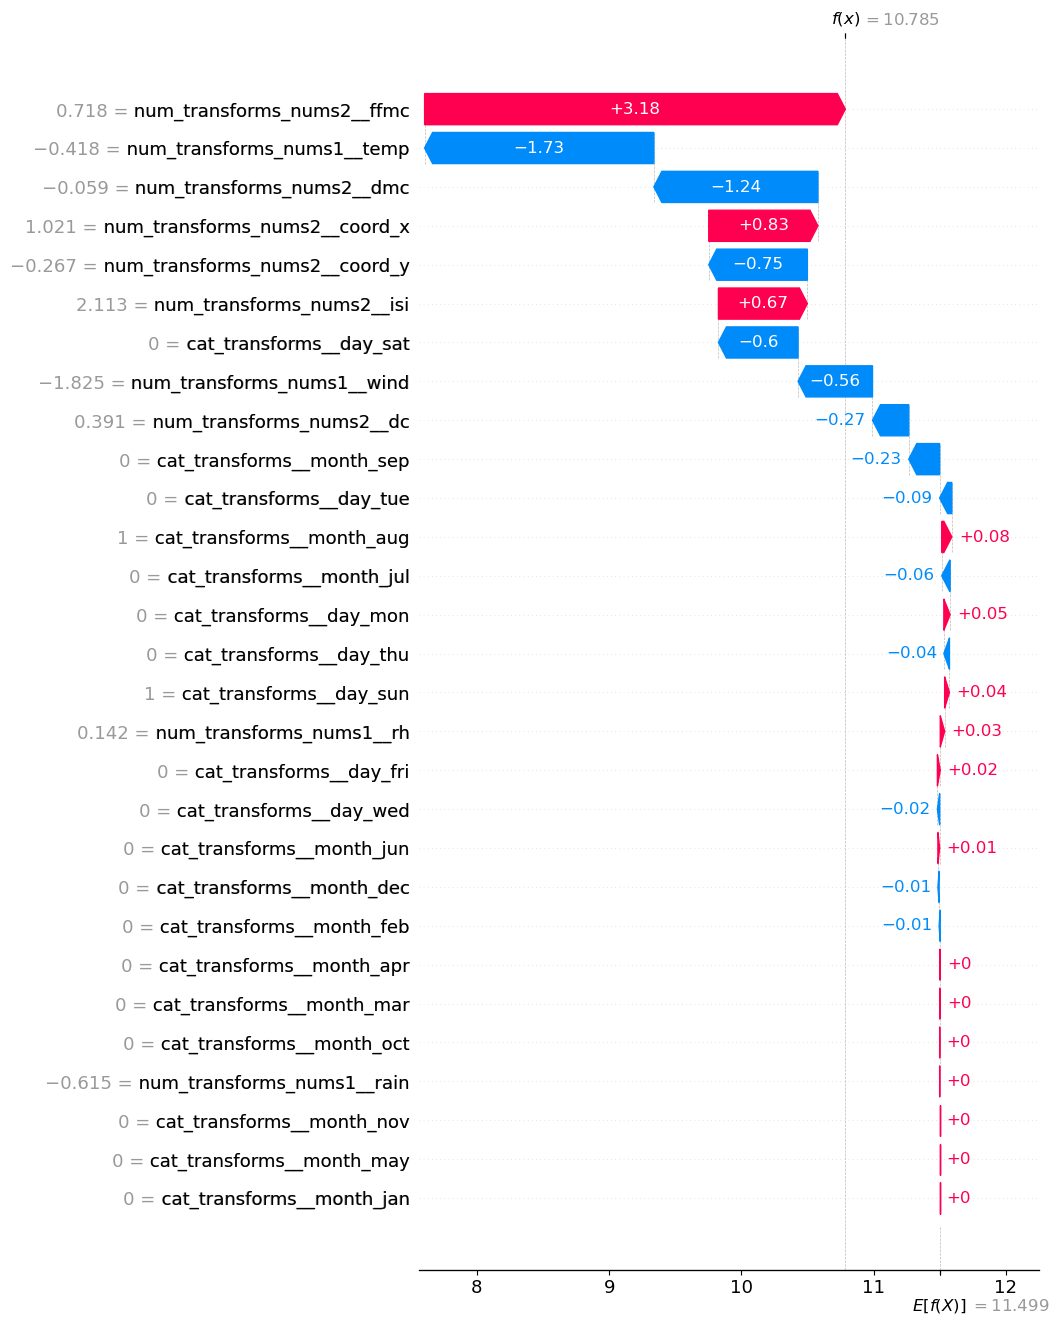

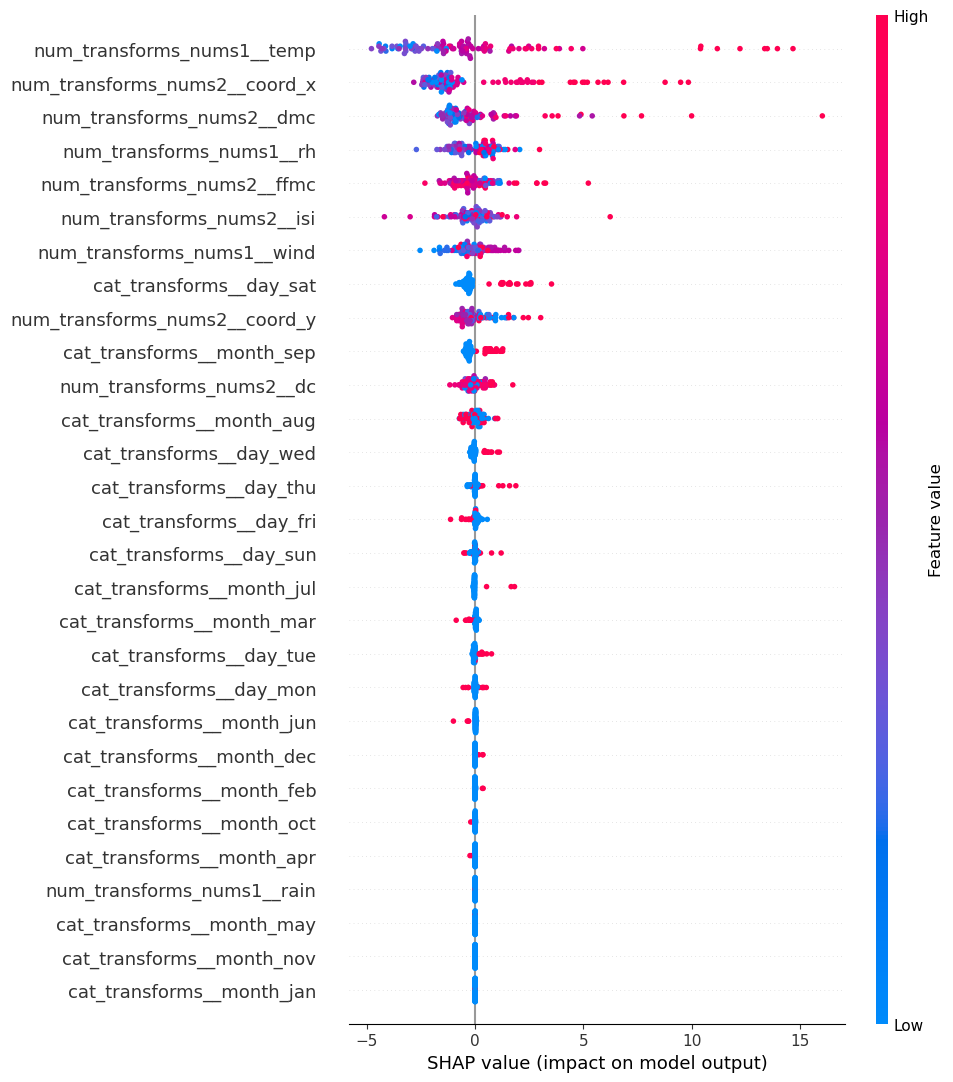

In [68]:
shap_values = explainer(data_transform, check_additivity = False)
shap.plots.waterfall(shap_values[42], max_display = 30)
shap.plots.beeswarm(shap_values, max_display = 30)

Answer

Based on this resuls, the top most important features are the FFMC (fine fuel moisture code), temperature, DMC (duff moisture code), Coordenates and day Saturday.

The least important are botthom ones observed in the figures: months of January, November, May, April, and rain.

We could visualize the impact of the features by plotting the performance metrics (e.g., accuracy, RMSE) when using all features vs. selected features.

I would remove the months and the rain features, becasue these features doesn't seem to enhance the model.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.